# Рынок заведений общественного питания Москвы

## Link to 

1.[Знакомство с данными](#data_info)  
    1.1 [Загрузка данных](#data_download)  
    1.2 [Составление профиля данных](#profiling)     
2.[Анализ данныз](#data_analysis)   
    2.1 [Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.](#three-one)  
    2.2 [Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график](#three-two)  
    2.3 [Для какого вида объекта общественного питания характерно сетевое распространение?](#tree-three)  
    2.4 [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#three-four)  
    2.5 [Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.](#three-five)  
    2.6 [Выделите в отдельный столбец информацию об улице из столбца address](#three-six)  
    2.7 [Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#three-seven)    
    2.8 [Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#three-eight)  
3.[Общий вывод](#Conclusion)
    


In [173]:
import pandas as pd 
pd.options.display.float_format = '{:,.0f}'.format
import datetime as dt
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px 

<a id="data_info"></a>
## 1. Знакомство с данными


<a id='data_download'></a>
### 1.1 Загрузка данных

In [64]:
try:
    data = pd.read_csv('/Users/ulia/Downloads/rest_data.csv')
except:
    data = pd.read_csv('/datasets/rest_data.csv')

In [65]:
print(data.head())
print()
print(data.info())

       id             object_name chain object_type  \
0  151635                 СМЕТАНА   нет        кафе   
1   77874                  Родник   нет        кафе   
2   24309         Кафе «Академия»   нет        кафе   
3   21894              ПИЦЦЕТОРИЯ    да        кафе   
4  119365  Кафе «Вишневая метель»   нет        кафе   

                                             address  number  
0         город Москва, улица Егора Абакумова, дом 9      48  
1  город Москва, улица Талалихина, дом 2/1, корпус 1      35  
2          город Москва, Абельмановская улица, дом 6      95  
3            город Москва, Абрамцевская улица, дом 1      40  
4  город Москва, Абрамцевская улица, дом 9, корпус 1      50  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        

<a id='profiling'></a>
### 1.2 Составление профиля данных

In [7]:
ProfileReport(data)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


### Дубликатов и пропусков нет, тип данных указан верно

<a id="data_analysis"></a>
## 2. Анализ данных

<a id="three-one"></a>
### 2.1 Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

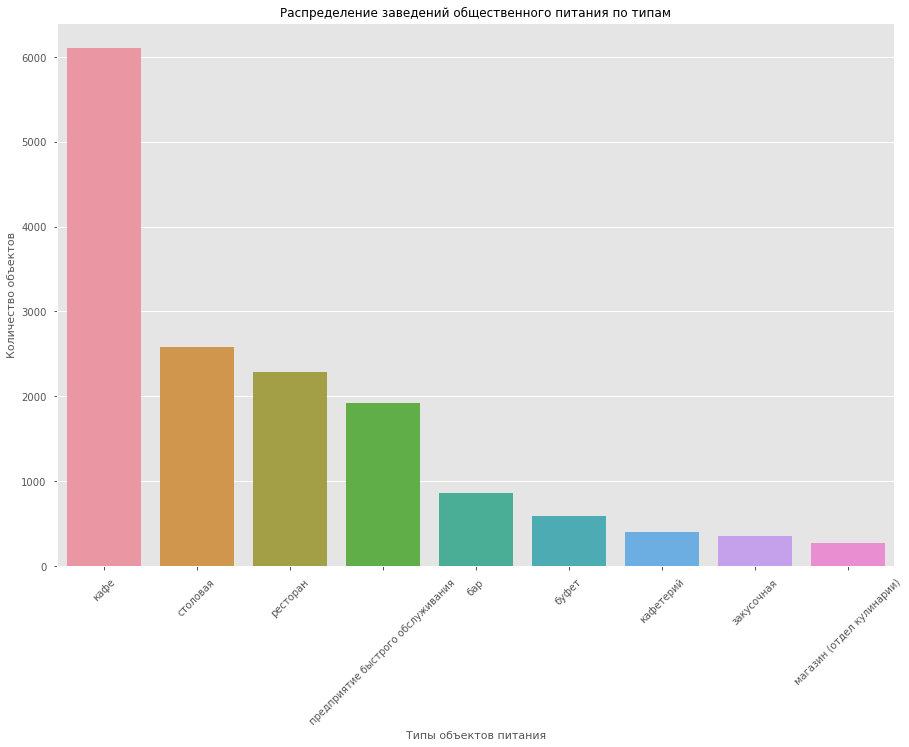

In [58]:
plt.figure(figsize=(15,10))
plt.style.use('seaborn-notebook')
sns.barplot(x='object_type',y='count', data=data.groupby('object_type',as_index=False)\
    .agg({'id':'count'})\
    .rename(columns={'id':'count'})\
    .sort_values(by='count', ascending=False))
plt.title('Распределение заведений общественного питания по типам')
plt.xlabel("Типы объектов питания")
plt.ylabel('Количество объектов')
plt.xticks(rotation=45)
plt.show()

### Как видно из графика, больше всего кафе, столовых и ресторанов, а меньше всего отделов кулинарии в магазинах

<a id="three-two"></a>
### 2.2 Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график

Text(0.5, 1.0, 'Распределение сетевых и несетевых заведений в Москве')

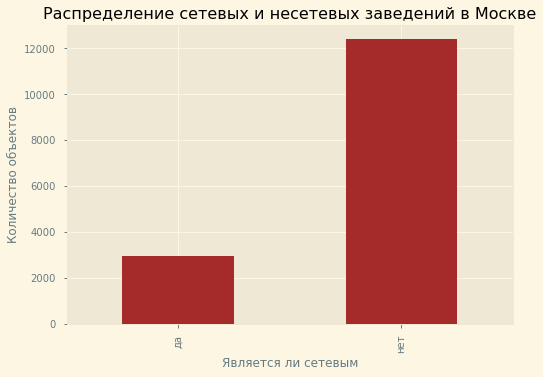

In [141]:
ax = data.groupby('chain').agg({'id':'count'}).plot(kind='bar', color='brown')
plt.xlabel('Является ли сетевым')
plt.ylabel('Количество объектов')
ax.get_legend().remove()
plt.title('Распределение сетевых и несетевых заведений в Москве')

### В Москве в 4 раза меньше сетевых завведений.

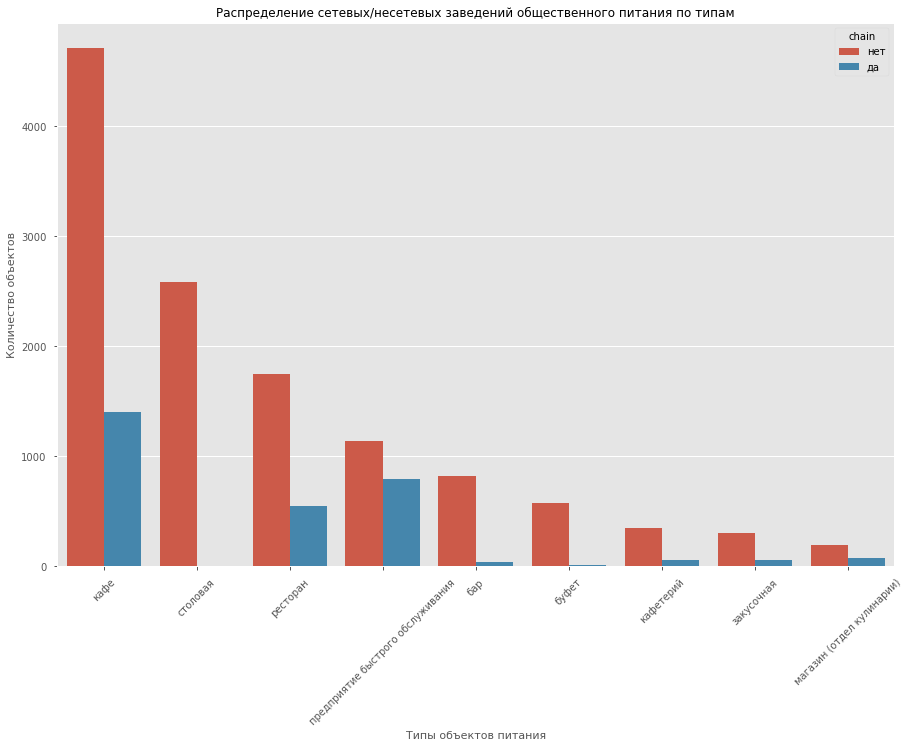

In [59]:
plt.figure(figsize=(15,10))
plt.style.use('seaborn-notebook')
sns.barplot(x='object_type',y='count', data=data.groupby(['object_type','chain'],as_index=False)\
    .agg({'id':'count'})\
    .rename(columns={'id':'count'})\
    .sort_values(by='count', ascending=False), hue='chain')
plt.title('Распределение сетевых/несетевых заведений общественного питания по типам')
plt.xlabel('Типы объектов питания')
plt.ylabel('Количество объектов')
plt.xticks(rotation=45)
plt.show()

### Видим, что во всем типам объектом превалируют несетевые объекты. Почти нет сетевых столовых.

<a id='three-three'></a>
### 2.3 Для какого вида объекта общественного питания характерно сетевое распространение?

In [60]:
data_grouped = data=data.groupby(['object_type','chain'],as_index=False)\
    .agg({'id':'count'})\
    .rename(columns={'id':'count'})\
    .sort_values(by='count', ascending=False)
data_grouped_chain = data_grouped.query('chain=="да"')
data_grouped_no_chain = data_grouped.query('chain=="нет"')


In [61]:
merged_chain = data_grouped_chain.merge(data_grouped_no_chain, on='object_type',suffixes=('_chain','_no_chain'))[['object_type','count_chain','count_no_chain']]

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1080x720 with 0 Axes>

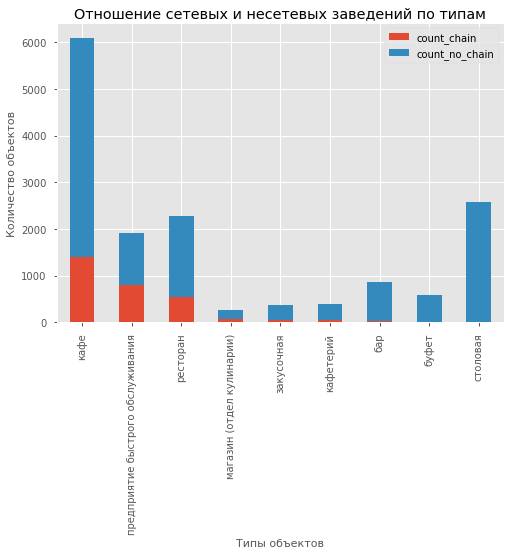

In [62]:
plt.figure(figsize=(15,10))
plt.style.use('seaborn-notebook')
merged_chain.set_index('object_type').plot(kind='bar',stacked=True)
plt.style.use('ggplot')
plt.xlabel('Типы объектов')
plt.ylabel('Количество объектов')
plt.title('Отношение сетевых и несетевых заведений по типам')
plt.show


### Самый большой процент сетевых объектов в предприятиях быстрого обслуживания

<a id='three-four'></a>
### 2.4 Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [155]:
fig = px.histogram(data.query('chain=="да"'), x="number",  labels={
                     "number": "Количество посадочных мест"
                 },
                title="Распределение посадочных мест в сетевых заведениях Москвы")
fig.update_annotations(title='Распределение')

In [158]:
fig = px.box(data.query('chain=="да"'), x="number")
fig.show()

In [162]:
def groups(number):
    if number < 40:
        return 'до 40 мест'
    elif (number>=40 and number< 75):
        return 'от 40 до 75 мест'
    elif (number >=75 and number< 150):
        return 'от 75 до 150 мест'
    else:
        return 'более 150 мест'

In [163]:
data['group'] = data['number'].apply

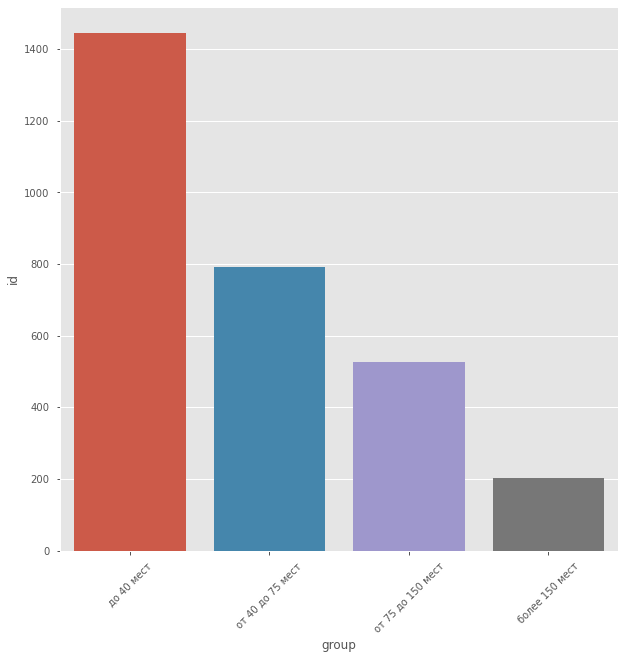

In [168]:
plt.figure(figsize=(10,10))
sns.barplot(x='group', y='id',data=data.query('chain=="да"').groupby('group',as_index=False)\
    .agg({'id':'count'}), order = ['до 40 мест','от 40 до 75 мест','от 75 до 150 мест','более 150 мест'])
plt.xticks(rotation=45)
plt.show()


### Среди сетевых заведений медианное значинеие - 40 мест, преобладают небольшие заведения

<a id='three-five'></a>
### 2.5 Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [174]:
data.groupby('object_type',as_index=False).agg({'number':'mean'}).sort_values(by='number',ascending=False)

,object_type,number
8,столовая,130
7,ресторан,97
1,буфет,51
0,бар,43
3,кафе,40
6,предприятие быстрого обслуживания,21
4,кафетерий,9
2,закусочная,8
5,магазин (отдел кулинарии),6


In [180]:
fig = px.bar(data.groupby('object_type',as_index=False).agg({'number':'mean'})\
    .sort_values(by='number',ascending=False), y='number', x='object_type', title='Среднее количество посадочных мест', 
    labels={'object_type':'Тип объекта', 'number':'Среднее кол-во посадочных мест'})
fig.show()

### Самое большое количество посадочных мест в среднем в столовых - 130, ресторанах - 97 и буфетах - 51

<a id='three-six'></a>
### 2.6 Выделите в отдельный столбец информацию об улице из столбца address

In [214]:
def streets(address):
    add_list = address.split(',')
    res = add_list[1]
    return res

In [215]:
data['street'] = data['address'].apply(streets)

In [219]:
data.head(10)

,id,object_name,chain,object_type,address,number,group,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,от 40 до 75 мест,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,до 40 мест,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,от 75 до 150 мест,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,от 40 до 75 мест,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,от 40 до 75 мест,Абрамцевская улица
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240,более 150 мест,Абрамцевская улица
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,до 40 мест,переулок Сивцев Вражек
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90,от 75 до 150 мест,Авиамоторная улица
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150,более 150 мест,Авиамоторная улица
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120,от 75 до 150 мест,Авиамоторная улица


<a id='three-seven'></a>
### 2.7 Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

<a id='three-eight'></a>
### 2.8 Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

<a id='Conclusion'></a>
## 3. Общий вывод  
### Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.